# Проект "Определение успешности игры"

**Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).** 

Представлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными

**Задача проекта:**
 - необходимо выявить определяющие успешность продажи игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Структура проекта:**
 - оценка общей информации о предоставленных данных,
 - подготовка данных: смена типа данных, обработка пропусков,
 - исследовательский анализ данных,
 - портрет пользователя каждого региона,
 - проверка гипотез,
 - общий вывод

## Общая информация о данных

Импортируем необходимые библиотеки, отключим предупреждения, после чего загрузим предоставленные данные и выведем первые 5 строк

In [1]:
#импортируем необходимые библиотеки, зададим формат вывода знаков после запятой
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pylab
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#функция для загрузки данных в датафрейм
def download(file):
    
    data = pd.DataFrame()
    
    path_1 = '/datasets/' + file + '.csv'
    path_2 = 'https://code.s3.yandex.net/datasets/' + file + '.csv'

    if os.path.exists(path_1):
        data = pd.read_csv(path_1, sep=',')
    elif os.path.exists(path_2):
        data = pd.read_csv(path_2, sep=',')
    else:
        print('Something is wrong')
        
    return data    

In [3]:
#загрузим данные из файла games.csv
data = download('games')
#выведем первые 5 строк
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Оценим общую информацию о предоставленных данных: 4-ре столбца являются категориальными данными, 7- количественными.

In [4]:
#выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм представлен 11-ю столбцами и 16715 строками. В 3-х столбцах присутствуют существенные пропуски (оценим далее в процентном отношении). 

Тип данных представлен как строковыми, так и числовыми -  тип данных в нескольких столбах необходимо будет изменить:
 - год релиза перевести в целочисленный,
 - оценку пользователей нужно будет привести в числовой.

Оценим долю пропусков

In [5]:
#выгрузим процентное значение пропусков по строкам
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


In [6]:
#выгрузим количеств-е значение пропусков по строкам
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В столбцах с оценкой критикой, пользователей и рейтингом от ESRB присутствует критичное кол-во пропусков (40% и выше), также небольшой процент пропусков в годах релиза(1.6%), по 2 пропуска с названием игры и жанром

Оценим статистику по числовым столбцам

In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Видим, что года релиза представлены выборкой от 1980 до 2016. Максимальные продажи в Северной Америке выше,чем в Европе в 2 раза, в то время как в Европе максимальные продажи почти в 3 раза выше, чем в Японии. Рейтинг критиков начинается с 13 баллов и заканчивается 98.


**Вывод по анализу общей информации**:

Датафрейм представлен 11-ю столбцами и 16715 строками. Года релиза представлены выборкой от 1980 до 2016. Максимальные продажи в Северной Америке выше,чем в Европе в 2 раза, в то время как в Европе максимальные продажи почти в 3 раза выше, чем в Японии. В 3-х столбцах присутствуют существенные пропуски: в столбцах с оценкой критикой, пользователей и рейтингом от ESRB присутствует критичное кол-во пропусков (40% и выше), также небольшой процент пропусков в годах релиза(1.6%) и по 2 пропуска в названии и жанре игр. Тип данных представлен как строковыми, так и числовыми -  тип данных в нескольких столбах необходимо будет изменить (год релиза перевести в целочисленный,оценку пользователей - в числовой.).

## Подготовка данных

### Замена названия столбцов и преобразование данных в нужные типы.

Для удобства приведем названия столбцов к нижнему регистру, после чего проверим как теперь выглядят названия столбцов

In [8]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
#проверим как выглядит таблица
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Как мы уже описали выше, необходимо столбец с годом релиза преобразовать в целочисленный формат и оценку пользователей в числовой формат. 

Для преобразования типа столбца с годом релиза пока заменим пропуски на год 1900 и уже в следующем пункте проведем анализ на предмет того, каким годом целесообразнее заполнить пропуски

In [9]:
#заменим пропуски в столбце с годом релиза на 1900 и сразу же поменяем формат
data['year_of_release'] = data['year_of_release'].fillna(1900).astype('int64')

Если бы данные столбца с оценкой пользователей заполнялся цифрами либо не заполнялся, то формат стал бы числовым, но поскольку тип стал строковой - это может говорить, что в столбце есть не только числовые данные.
Проверим какие значение присутствуют в столбце

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме цифр и пропусков ест некое значение 'tbd': согласно данным сети интернет- это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.Причиной проставления этой аббревиатуры может быть то, что на момент сбора данных оценка еще не производилась (например, игра только вышла), либо не была проставлена пользователями  на определенном ресурсе (в данных присутствует информация о продажах в Америке, Европе и Японии: скорее всего данная оценка производилась на определенном сайте и языке (скорее всего английском), но, например, небольшой процент японцев его знает), либо для получения оценки получено недостаточное кол-во отзывов. 

Оценим, сколько таких неоцененных значений в предоставленных данных

In [11]:
len(data[data['user_score']=='tbd'])

2424

Таких строк всего 2424 из 16715. По сути это те же пропуски, поэтому пока можем заменить на None и далее решим каким образом и будем ли заполнять пропуски по столбцу. После замены поменяем тип данных в столбце

In [12]:
#заменим 'tbd' на nan
data.loc[data['user_score']=='tbd', 'user_score'] = None
#поменяем тип данных в столбце
data['user_score'] = data['user_score'].astype('float64')

Теперь проверим тип данных в датафрейме и после кол-во пропусков(оно должно увеличиться в столбце с оценкой пользователей)

In [13]:
#выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
#выгрузим процентное значение пропусков по строкам
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Теперь везде корректный тип данных.
Также мы заменили значение 'tbd' на пропуски в столбце с оценкой пользователей и поэтому в этом столбце кол-во пропусков увеличилось

Далее проведем работу по заполнению пропусков

### Обработка пропусков и дубликатов

Напомним, что пропуски присутствовали в столбце с названием и жанром ( по 2 пропуска),с годом релиза (1.6% - временно заполнили значением 1900), в столбце с оценкой критиков (51.3%), в столбце с оценкой пользователей (54.6% с учетом 'tbd', которые по сути являются пропусками) и в рейтинге от ESRB (40.5%). Т.о. в столбцах с оценками пропуски существенные.

Пропуски в столбце с годом релиза являются незначительными, не могут существенно повлиять на анализ, средним/медианой заполнить нельзя, поэтому при невозможности из заполнить оставим в текущем виде (при необходимости провести анализ по ним они обозначены "нереальным" для выпуска игр годом - 1900).

С пропусками в столбцах с оценками хуже, пропуски там составляют почти половину всех данных. Причиной появления пропусков в данных столбцах могут быть следующими:
 - игры были выпущены еще до того, как игровая индустрия стала популярной и начала развиваться - еще до  появления системы по оценке игр как критиками, так и пользователями ( есть игры еще 80-х и 90-х годов),
 - оценки отсутствуют по непопулярным играм: например, оценка пользователей формируется только при кол-ве отзывов свыше 1000 и больше - и данная игра просто не набрала столько отзывов, чтобы оценка по ней стала объективной. В целом, кол-во пропусков в оценке пользователей и критиков примерно совпадает, возможно критики оценивают только те игры, по  которым есть достаточное кол-во отзывов, т.е. без отзывов пользователей - не будет отзывов критиков, 
 - продажи представлены рынком Америки, Европы и Японии, прочими странами в меньшей степени: возможно игра была популярна в одних странах, но оценка производилась на ресурсе с языком другой страны (пример выше - игра популярна в Японии, а оценка на английском без возможности выбрать японский),
 - согласно википедии  Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»).Возможно часть игр с годом релиза до 1994 года не была отрейтингована, так в рейтингование попали только игры из стран США и Канада. Помимо рейтинга ESRB, Европа и другие страны имеют своию рейтиинговые агентства: европейское PEGI,немецкое USK,японское CERO и российское RARS. Возможно при производстве игр в других странах первостепенным являются рейтинги этих стран, поэтому по этим играм пропуски в рейтинге ESRB.

Оценим кол-во пропусков по годам в столбцах с отзывами и рейтингом: для этого создадим таблицу с долями пропусков в каждом столбце по годам без учета пропусков по годам (такие пропуски у нас были помечены как 1900) и посмотрим на нашу созданную таблицу(выведем любые 5 строк)

In [15]:
#создадим таблицу с долями пропусков
null = pd.DataFrame()
#наполним данные по доле пропусков в отзывах пользователей, критиков и рейтинге соответственно
null['null_user_score'] = 100*(data.query('user_score.isna()')\
                               .groupby('year_of_release')['year_of_release'].count()/ \
                      data.groupby('year_of_release')['year_of_release'].count())
null['null_critic_score'] = 100*(data.query('critic_score.isna()')\
                               .groupby('year_of_release')['year_of_release'].count()/ \
                      data.groupby('year_of_release')['year_of_release'].count())
null['null_rating'] = 100*(data.query('rating.isna()')\
                               .groupby('year_of_release')['year_of_release'].count()/ \
                      data.groupby('year_of_release')['year_of_release'].count())
#исключим пропуски в годах(1900 год)
null = null.query('year_of_release!=1900').reset_index()
#выведем любые 5 строк
null.sample(5)

,year_of_release,null_user_score,null_critic_score,null_rating
2,1982,100.00,100.00,100.00
11,1991,100.00,100.00,100.00
0,1980,100.00,100.00,100.00
3,1983,100.00,100.00,100.00
33,2013,44.12,49.82,41.91


На одной столбчатой гистограмме оценим пропуски по годам

In [16]:
#создадим функцию для построения линейного графика
def plot(xdata, ydata,label,color=None):
    plt.plot(xdata, ydata,color=color,label=label,linewidth=3,alpha=0.7)

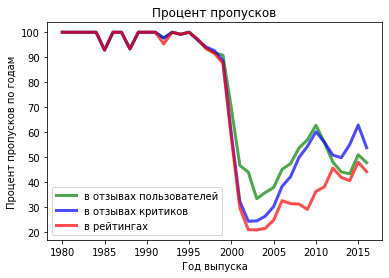

In [17]:
#построим линейный график для процента пропусков в отзывах и рейтинге
plot(null['year_of_release'],null['null_user_score'],'в отзывах пользователей','green');
plot(null['year_of_release'],null['null_critic_score'],'в отзывах критиков','blue');
plot(null['year_of_release'],null['null_rating'],'в рейтингах','red');
plt.legend()
plt.title('Процент пропусков');
plt.xlabel('Год выпуска');
plt.ylabel("Процент пропусков по годам");

Мы видим, что до 1997 года доля пропусков по всем 3-м столбцам одинаковая и  доходит до 100% и далее до 1999 включительно доли пропусков также практически одинаковые, но сокращаются до примерно 90%. С 2000-го года наблюдается снижение пропусков во всех столбцах - началась эра активного развития компьютерных игр,с развитием которой развивалась и система оценок. Пропуски в отзывах пользователей и критиков примерно совпадают, возможно прослеживается зависимость наличия оценки критиков от наличия оценки пользователей - проверим теорию, что пропуски в отзывах критиков соответствуют играм с пропусками в отзывах пользователей

In [18]:
data.query('critic_score.isna() and user_score.isna()').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.00,NaN,NaN,NaN
15994,God Eater Off Shot:Shiou-hen Twin Pack & Anima...,PS4,2016,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8656,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,PSP,2008,Strategy,0.00,0.00,0.16,0.00,NaN,NaN,NaN
10256,Shining Ark,PSP,2013,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN
16265,Ouka Sengoku Portable,PSP,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
3955,Disney Sing It,PS2,2008,Misc,0.25,0.19,0.00,0.06,NaN,NaN,E
11905,Hakuouki: Yuugi Roku,PSP,2010,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
8581,Starcraft 64,N64,2000,Strategy,0.13,0.03,0.00,0.00,NaN,NaN,NaN
8346,Michael Jackson: The Experience 3D,3DS,2011,Misc,0.13,0.03,0.00,0.01,NaN,NaN,NaN
8921,Backyard Sports: Sandlot Sluggers,Wii,2010,Sports,0.14,0.00,0.00,0.01,NaN,NaN,E


Теорию можем признать верной: в 94% пропусков по столбцу оценки пользователей(8005/8517 пропусков по столбцу оценка критиков) отсутствует и оценка критиков.

Проверим теорию о том, что рейтингование от ESRB отсутствует всегда, если нет оценки от пользователей и критиков

In [19]:
data.query('critic_score.isna() and user_score.isna() and rating.isna()').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14360,Saru! Get You! SaruSaru Daisakusen,PSP,2007,Platform,0.00,0.00,0.03,0.00,NaN,NaN,NaN
5086,Phantasy Star Portable 2: Infinity,PSP,2011,Role-Playing,0.00,0.00,0.37,0.00,NaN,NaN,NaN
8696,Wing Commander III: Heart of the Tiger,PS,1996,Action,0.09,0.06,0.00,0.01,NaN,NaN,NaN
4603,Jikkyou Powerful Pro Yakyuu 6,N64,1999,Sports,0.00,0.00,0.39,0.03,NaN,NaN,NaN
9229,The History Channel: Civil War - A Nation Divided,X360,2006,Shooter,0.13,0.00,0.00,0.01,NaN,NaN,NaN
10721,Fifi and the Flowertots,DS,2009,Misc,0.00,0.09,0.00,0.01,NaN,NaN,NaN
3790,Front Mission 2,PS,1997,Strategy,0.00,0.00,0.49,0.03,NaN,NaN,NaN
11826,Cartoon Network: Punch Time Explosion XL,X360,2011,Fighting,0.07,0.00,0.00,0.01,NaN,NaN,NaN
10943,Shin Megami Tensei,PS,2001,Role-Playing,0.00,0.00,0.09,0.01,NaN,NaN,NaN
15477,Ferrari Challenge Trofeo Pirelli Deluxe,Wii,2009,Racing,0.00,0.02,0.00,0.00,NaN,NaN,NaN


Теорию можем признать верной: 39.9% пропусков из 40.5% по столбцу с рейтингом ESRB в тех же строках, что и пропуски по оценке пользователей и критиков.

Проверим теорию, что поскольку ESRB это организация, отвечающая за рейтингование игр в США и Канаде, то  рейтинг ESRB всегда будет по играм, которые имеют продажи в Северной Америке (после 2000), соответственно все пропуски будут по играм с продажами в других регионах - посчитаем долю

In [20]:
round(data.query('year_of_release>=2000 and na_sales>0 and rating.isna()')\
  ['year_of_release'].count()/ \
     data.query('year_of_release>=2000 and na_sales>0')['year_of_release'].count(),3)

0.167

После 2000 года доля пропусков в рейтинге по играм, продаваемым в Северной Америке составляет 16.7%. А что с другими регионами, например, с Европой и Японией(зададим условие, что есть продажи в Европе или Японии, но отсутствуют в Северной Америке)

In [21]:
#доля пропусков для Европы
round(data.query('year_of_release>=2000 and eu_sales>0 and na_sales==0 and rating.isna()')\
  ['year_of_release'].count()/ \
data.query('year_of_release>=2000 and eu_sales>0 and na_sales==0')\
  ['year_of_release'].count(),3)

0.423

In [22]:
#доля пропусков для Японии
round(data.query('year_of_release>=2000 and jp_sales>0 and na_sales==0 and rating.isna()')\
  ['year_of_release'].count()/ \
data.query('year_of_release>=2000 and jp_sales>0 and na_sales==0')\
  ['year_of_release'].count(),3)

0.937

Разница в пропусках существенная: после 2000 года при продажах в Северной Америке пропуски в рейтинге составляют менее 17%, при этом при отсутствии продаж в Северной Америке пропуски по играм с продажами в Европе в 3 раза выше - 42%, в Японии - почти 94%. Т.о. по отсутствию пропусков в столбце рейтинги можно оценить на продажи в каком регионе ориентирована игра.

Влияет ли регион также на отсутствие отзывов со стороны критиков и пользователей: поскольку мы выявили, что в 94% случаев при отсутствии отзыва пользователя будет отсутствовать отзыв критика, то можем оталкиваться от отсутствия отзывов критиков при оценке

In [23]:
#для пропусков для Северной Америки
round(data.query('year_of_release>=2000 and critic_score.isna() and na_sales>0')\
  ['year_of_release'].count()/ \
     data.query('year_of_release>=2000 and na_sales>0')['year_of_release'].count(),3)

0.32

Проверим также другие регионы (зададим условие, что есть продажи в Европе или Японии, но отсутствуют в Северной Америке)

In [24]:
#доля пропусков для Европы
round(data.query('year_of_release>=2000 and critic_score.isna() and na_sales==0 and eu_sales>0')\
  ['year_of_release'].count()/ \
     data.query('year_of_release>=2000 and na_sales==0 and eu_sales>0')['year_of_release'].count(),3)

0.518

In [25]:
#доля пропусков для Японии
round(data.query('year_of_release>=2000 and critic_score.isna() and na_sales==0 and jp_sales>0')\
  ['year_of_release'].count()/ \
     data.query('year_of_release>=2000 and na_sales==0 and jp_sales>0')['year_of_release'].count(),3)

0.95

Регион также оказывает влияние на кол-во пропусков в отзывах: в ориентированных на продажи в Северной Америке играх доля пропусков наименьшая (32%), на Европу уже существенно выше (52%), на Японию - пропуски будут почти всегда. Предположительно для оценки используются только рейтинги на широкораспространенных языках ( английский и пр.), в который японский не входит.

По совокупности фактов можно отметить следующее:
 - до 1997 года доля пропусков по всем 3-м столбцам одинаковая и  доходит до 100% и далее до 1999 включительно доли пропусков также практически одинаковые, но сокращаются до примерно 90%. С 2000-го года наблюдается снижение пропусков во всех столбцах - началась эра активного развития компьютерных игр,с развитием которой развивалась и система оценок.
 - оценка критиков будет отсутствовать почти всегда при отсутствии оценки пользователей,
 - значение рейтинга ESRB почти всегда будет отсутствовать при отсутствии оценки критиков/пользователей,
 - оценка ESRB проводится по играм продаваемым в США и Канаде, поэтому с 2000 года на наличие пропусков влияет страна продаж: при продажах в Северной Америке пропуски в рейтинге составляют менее 17%, при этом при отсутствии продаж в Северной Америке пропуски по играм с продажами в Европе в 3 раза выше - 42%, в Японии - почти 94%.
 - на кол-во отзывов критиков и пользователей влияет регион:в ориентированной на продажи в Северной Америке играх доля пропусков наименьшая (32%), на Европу уже существенно выше (52%), на Японию - пропуски будут почти всегда. Предположительно для оценки используются только рейтинги на широкораспространенных языках ( английский и пр.), в который японский не входит.

  
В любом случае, оценка является важным фактором формирования мнения о покупательском спросе и предпочтениях, поэтому заполнять пропуски в  оценках/рейтинге средним/медианой/модой нецелесообразно ( рейтинг это вообще категориальное значение и среднее/медиана/мода для него не применимо). Возможно есть игры, выходящие на разных платформах, которые на одной платформе имеют год выпуска/отзывы, а на другой не имеют: игры на разных платформах часто выходят в этом же году или с годом разницы, поэтому заполнить пропуски по годам через одинаковые игры возможно, но технические характеристика платформ могут отличаться, что может повлиять на отзывы, поэтому таким же образом заполнить пропуски по отзывам не совсем корректно

Поэтому для последующей работы:
 - пропуски в году попробуем заполнить годом выпуска аналогичных игр на других платформах (если такие есть, при отсутствии - оставим 1900 год),
 - пропуски в столбце с рейтингом ESRB: заполним через аналогичные наименования,остальное заполним значением 'no rating',
 - пропуски в числовых столбцах (оценка пользователей и критиков) заполнять не будем,поскольку пропусков очень много и их заполнение каким-либо значением может сместить статистику,
 - также было по 2 пропуска в названии игры и жанре: поскольку таких значений очень мало-удалим их
 
Сначала проведем работу по заполнению пропусков по году: проверим есть ли совпадания в названиях с отсутствующим годом (у нас помечен как 1900) с названиями, для которых год присутствует

In [26]:
#создадим список уникальных названий в строках с пропусками
nan_name = list(data.query('year_of_release==1900')['name'].unique())
#создадим таблицу с названиями,для которых год есть, из списка выше
name_is= data.filter(['name', 'year_of_release']).query('name in @nan_name and year_of_release!=1900')\
.dropna(subset=['year_of_release']).drop_duplicates(subset='name').reset_index(drop=True)
#посмотрим на эту таблицу
name_is.sample(5)

,name,year_of_release
68,Samurai Shodown Anthology,2008
54,Tropico 4,2011
51,Nicktoons: Battle for Volcano Island,2006
43,"The Chronicles of Narnia: The Lion, The Witch ...",2005
6,LEGO Indiana Jones: The Original Adventures,2008


Далее заполним пропуски по годам в наших данных, исходя из года таблицы выше (таких наименований 99) и оценим процент оставшихся пропусков 

In [27]:
#вытащим списки с годом и названием из таблицы выше
name = name_is['name'].tolist()
year = name_is['year_of_release'].tolist()
#создадим цикл для замены пропуска (1900) на год для соответствующего наименования
for i in range(len(name)):
        data.loc[((data['year_of_release'] ==1900 ) & (data['name'] == name[i]) ), 'year_of_release' ] = year[i]
#оценим процент пропусков по столбцу
print('Пропуски по столбцу с годом релиза:',round(len(data.loc[(data['year_of_release'] ==1900)])*100/16715,2),'%')

Пропуски по столбцу с годом релиза: 0.87 %


По столбцу с годом релиза кол-во пропусков сократилось с 1.6% до менее 0.9%.

Проведем аналогичную работу по заполнению пропусков в рейтингах через наименование

In [28]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
#заполним пропуски значением no_rating
data['rating'] = data['rating'].fillna('no_rating')
#создадим список уникальных названий из строк с пропусками
nan_name = list(data.query('rating=="no_rating"')['name'].unique())
#создадим таблицу с названиями,для которых рейтинг есть, из списка выше
name_is= data.filter(['name', 'rating']).query('name in @nan_name and rating!= "no_rating"')\
.dropna(subset=['rating']).drop_duplicates(subset='name').reset_index(drop=True)
#посмотрим на эту таблицу
name_is.sample(5)

,name,rating
122,NHL 16,E10+
78,The Elder Scrolls Online,M
202,Tales of Phantasia,E10+
36,Monster Hunter Freedom 2,T
134,Payday 2,M


Названий, по которым есть пропуски и есть строки с аналогичными названиями и при наличии рейтинга

In [30]:
#вытащим списки с  и названием из таблицы выше
name = name_is['name'].tolist()
rating = name_is['rating'].tolist()
#создадим цикл для замены пропуска (no_rating) на рейтинг для соответствующего наименования
for i in range(len(name)):
        data.loc[((data['rating']=='no_rating') & (data['name'] == name[i]) ), 'rating' ] = rating[i]
#оценим процент пропусков по столбцу
print('Пропуски по столбцу с рейтингом:',round(len(data.query('rating=="no_rating"'))*100/16715,2),'%')

Пропуски по столбцу с рейтингом: 37.86 %


Процент пропусков по столбцу с рейтингами сократился с 40.5% до 37.9%.

Далее удалим 2 пропуска в названии, жанре и посмотрим сколько пропусков всего осталось

In [31]:
#удалим строки с пропусками в столбцах с названием и жанром игры
data = data.dropna(subset=['name','genre'])
#проверим процент пропусков
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Проверим наш датафрейм на явные и неявные дубликаты

In [32]:
data.duplicated().sum()

0

Явных дубликатов нет, может быть есть неявные (в данном случае неполные) - игры, выпущенные в один и тот же год, но на разных платформах

In [33]:
data[['name','genre','year_of_release']].duplicated().sum()

4384

В наших данных около четверти всех игр, выпущенных в один и тот же год, но на разных платформах.
Может быть есть неявные дубликаты, которые мы не можем выявить из-за разных сумм продаж?

In [34]:
data[['name','genre','year_of_release','platform']].duplicated().sum()

1

Есть 1 дубликат одной игры, выпущенной в один и тот же год на одной платформе. Посмотрим, что это за строки

In [35]:
data.loc[data.duplicated(['name','genre','year_of_release','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


Посмотрим как выглядят дубликаты

In [36]:
data.loc[(data['name']=='Madden NFL 13') & (data['genre']=='Sports') & (data['year_of_release']==2012) \
         & (data['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


Строка 604 более полная в части продаж, считаем корректным оставить ее

In [37]:
data.drop(16230, inplace=True)

In [38]:
data.loc[data.duplicated(['name','genre','year_of_release','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Дубликатов игр, выпущенных в один и тот же год на одной платформе больше нет.

### Cуммарные продажи во всех регионах

Создадим отдельный столбец с продажами во всех регионах и посмотрим как будет выглядеть таблица

In [39]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


**Вывод по предобработке данных**:


1) Скорректирован тип данных для столбца с годом релиза и оценкой пользователей (приведены к целочисленному и числовому соответственно). Также мы заменили значение 'tbd' на пропуски в столбце с оценкой пользователей и поэтому в этом столбце кол-во пропусков увеличилось тип данных

2) Проведена работа по анализу возможным причин пропусков в рейтинге ESRB и отзывах пользователей/критиков, проведен анализ закономерностей пропусков в этих столбцах:
- до 1997 года доля пропусков по всем 3-м столбцам одинаковая и доходит до 100% и далее до 1999 включительно доли пропусков также практически одинаковые, но сокращаются до примерно 90%. С 2000-го года наблюдается снижение пропусков во всех столбцах - началась эра активного развития компьютерных игр,с развитием которой развивалась и система оценок.
- оценка критиков будет отсутствовать почти всегда при отсутствии оценки пользователей,
- значение рейтинга ESRB почти всегда будет отсутствовать при отсутствии оценки критиков/пользователей,
- оценка ESRB проводится по играм продаваемым в США и Канаде, поэтому с 2000 года на наличие пропусков влияет страна продаж: при продажах в Северной Америке пропуски в рейтинге составляют менее 17%, при этом при отсутствии продаж в Северной Америке пропуски по играм с продажами в Европе в 3 раза выше - 42%, в Японии - почти 94%.
- на кол-во отзывов критиков и пользователей влияет регион:в ориентированной на продажи в Северной Америке играх доля пропусков наименьшая (32%), на Европу уже существенно выше (52%), на Японию - пропуски будут почти всегда. Предположительно для оценки используются только рейтинги на широкораспространенных языках ( английский и пр.), в который японский не входит

3)Проведена работа по заполнению пропусков в столбце с годом релиза и рейтингом, вследствие чего доля пропусков в этих столбцах сократились с 1.6% до 0.9% и с 40.5% до 38% соответственно. Оставшиеся пропуски в этих столбцах заполнены значением нереального года для года релиза (1900) и значением no_rating для рейтинга. Самые большие пропуски в столбцах отзывы пользователей и критиков заполнить медианой/средним будет некорректно, т.к. Может исказить выводы, заполнение выделяющимися числовыми значениями также некорректно, поскольку это может исказить статистику - поэтому пропуски в этих столбцах решено не заполнять.

4) Дополнительно проведена работа по поиску дубликатов и выявлено, что в наших данных около четверти всех игр, выпущенных в один и тот же год, но на разных платформах. Также удалена строка с дубликатом 1-й игры



## Исследовательский анализ данных

### Корреляция выпускаемых игр по годам

Оценим, сколько игр выпускалось в разные годы и важны ли данные за все периоды. Построим гистограмму распределения выпускаемых игр по годам, диаграмму размаха и выведем статистику по столбцу (без учета пропусков). 

Под выпуском игры подразумевается выпуск игры в определенный год на определенной платформе,т.е. если в один и тот же год эта игра выпущена на 2-х разных платформах - то это 2 выпуска. Для понимания в т.ч. кол-ва самих игр без учета платформы, рассмотрим также распределение именно выпуска новых игр без учета того, на скольких платформах она вышла.

Зеленый - выпуск новых игр без учета того, на скольких платформах она вышла, зеленый и синий - это кол-во выпускаемых игр в определенный год на определенной платформе, соответственно, разница между этим значениями подсвечена красным (как мы выявили ранее при проверке дубликтов, совокупно по всем годам эта разница составила 4383 значений).

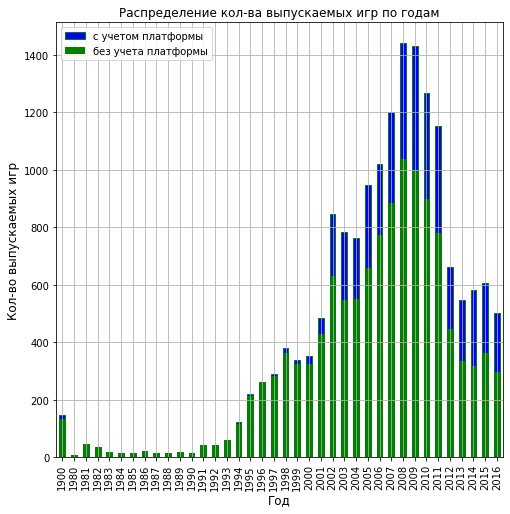

In [40]:
#выведем гистограмму распределения игр по годам с учетом платформы и без
ax = plt.gca()
data.groupby('year_of_release')['year_of_release'].count()\
.plot(kind='bar', ax=ax, color='blue', ec='green',figsize=(8,8),grid=True);

data.drop_duplicates(subset=['year_of_release','name'],keep='first',inplace=False)\
.groupby('year_of_release')['year_of_release'].count()\
.plot(kind='bar', ax=ax, color='green',figsize=(8,8),grid=True);

plt.ylabel('Кол-во выпускаемых игр', fontsize=12);
plt.xlabel('Год', fontsize=12);
plt.title('Распределение кол-ва выпускаемых игр по годам');
ax.legend(['с учетом платформы','без учета платформы']);

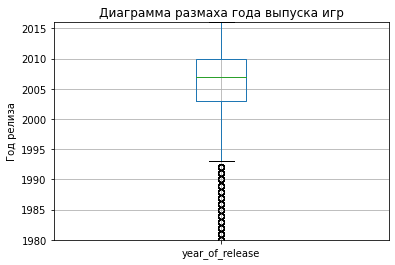

In [41]:
#выведем диаграмму размаха кол-ва игр  с учетом платформы
data.boxplot(column='year_of_release')
plt.ylim(1980, 2016)
plt.ylabel('Год релиза', fontsize=10);
plt.title('Диаграмма размаха года выпуска игр',fontsize=12);

In [42]:
#выведем статистику по столбцу без учета пропусков и с учетом платформы
data.query('year_of_release!=1900')['year_of_release'].describe()

count   16,566.00
mean     2,006.49
std          5.86
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64

In [43]:
#выведем статистику по столбцу без учета пропусков и без учета  платформы
data.drop_duplicates(subset=['year_of_release','name'],keep='first',inplace=False)\
.query('year_of_release!=1900')['year_of_release'].describe()

count   12,195.00
mean     2,005.71
std          6.16
min      1,980.00
25%      2,002.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64

Напомним, что под годом 1900 подразумеваются игры с пропуском в годе релиза. На гистограмме распределения приведены данные как по выпуску игр на определенной платформе, так и по выпуску игр в целом, синим подсвечена разница в значении - если не учитывать каждую платформу отдельно, то конекретно игр было выпущено на четверть меньше.Как мы видим из гистограммы игр с выпуском в период с 1980 по 1990 очень мало, с 1991 года начинается постепенный рост, пиковые значения приходятся на 2008-2009 года. Согласно диаграмме размаха значения менее 1993 года являются выбросами, наиболее частые года выпуска лежат в диапазоне 1994 - 2016 года, медиана как с учетом выпуска на каждой платформе, так и без - 2007 год, на год в большую сторону отличается от среднего, половина всех значений находятся в промежутке от 2003 года до 2010.

Причиной низких значений выпуска игр в 80-десятые года 20 века связан с кризисом индустрии компьютерных игр 1983 года, который продолжался вплость до 90-х.Далее, согласно википедии, 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO.Далее резкий скачок наблюдается в 2002 году, он связан как с развитием программного обеспечения в целом, увеличением конкуренции на рынке компьютерных игр, пик которого приходится на 2008-2009 года - до периода крупнейшего мирового финансового кризиса, после которого некоторые игроки (вероятно из-за финансовых проблем) покинули рынок. С 2012 года наблюдается некоторое снижение кол-ва выпускаемых игр: с одной стороны в этот год была запущена платформа для финансирования разработчиков игр Kickstarter, с другой стороны несколько крупнейших издательств оказались банкротами (вероятно те же последствия кризиса 2008-2009 года).

Учитывая распределение данных о выпуске игр, данные до 1993 года являются крайне несущественными, в т.ч. они оцениваются как выбросы,за этот период практически 100% пропусков по отзывам пользователей и рейтингам, поэтому для последующего анализа этим данными можно будет пренебречь. 

In [44]:
data = data.query('year_of_release>1993')

### Продажи по крупнейшим платформам

Оценим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам, после чего проанализируем, за какой характерный срок появляются новые и исчезают старые платформы

Оценим платформы с максимальными продажами через столбчатую диаграмму

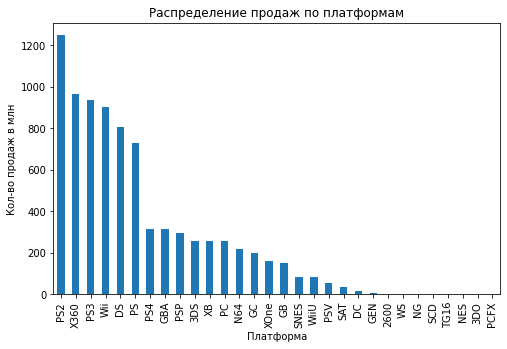

In [45]:
data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(kind='bar',\
                                            title='Распределение продаж по платформам',figsize=(8,5))
plt.xlabel('Платформа');
plt.ylabel('Кол-во продаж в млн');

Для анализа возьмем топ-6 платформ с максимальными продажами (считаю необходимым взять по PS  включительно, т.к. после него продажи уже более чем в 2 раза ниже):PS2,X360,PS3,WII,DS,PS.

Построим распределение продаж по годам (начиная с 1994 года, т.к. данные до этого года непоказательны - см. выше)
Сначала создадим сводную таблицу, сгруппированную по годам и платформам и выведем 5 любых строк, затем визуализируем распределение суммарных продаж по топ-6 платформам по годам

In [46]:
# создадим сводную таблицу, сгруппированную по годам
main_sales = data\
     .pivot_table(index=['platform','year_of_release'],values='all_sales',aggfunc='sum').reset_index()
#выведем любые 5 строк
main_sales.sample(5)

,platform,year_of_release,all_sales
133,PSP,2010,35.04
127,PSP,2004,7.06
131,PSP,2008,36.76
198,XB,2008,0.18
57,N64,2001,3.25


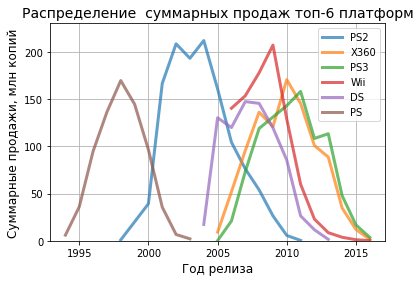

In [47]:
#сохраним список с топ-6 платформ
a = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(6).index.tolist()

#создадим цикл для построения графика для каждой платформы из списка а
for i in a:
    plot(main_sales.query('platform==@i')['year_of_release'],\
         main_sales.query('platform==@i')['all_sales'], label=i)

plt.legend()
plt.grid(True)
plt.ylim(0, 230)
plt.ylabel('Суммарные продажи, млн копий', fontsize=12)
plt.xlabel('Год релиза', fontsize=12)
plt.title('Распределение  суммарных продаж топ-6 платформ', fontsize=14)
plt.show()    

На основании представленного выше графика, оценим, за какой характерный срок появляются новые и исчезают старые платформы:

 - PS - с 1993 года до 2003 - более 10 лет,пиковое значение - в 1998,
 - PS2 - с 2000 до 2011 года - более 11 лет,пиковое значение - 2002-2004
 - DS - в 2004 году продажи начали увеличиваться, максимальные продажи в период 2007-2008 года, далее падение и прекращение продаж в 2013 год - фактически срок более 9 лет,
 - X360 -фактически продажи начались в 2005, в 2007 - 2010 пришелся пик, далее существенно пошел на спад.Т.о. срок активных продаж - около 11-12 лет 
 - Wii - с 2006 по нынешний день, пик на 2007-2009 года,в 2013 году производство прекрашено и  далее существенный спад и минимальные продажи - фактический срок менее 10 лет.
 - PS3 - с 2006 года  по настоящее время, с 2011 года наблюдается падение продаж. Т.о. на момент наблюдения срок "жизни" более 12 лет,
 
В целом, срок активной "жизни" (период активных продаж) составляет около 10-11 лет, при этом пик продаж приходится на 3-5 год "жизни". Учитывая постоянно ускоряющийся технический прогресс, увеличение пропускной способности, качества в геометрической прогресс, данный срок вполне ожидаем.

### Продажи за актуальный период потенциально прибыльных платформ

Необходимо проанализировать данные за соответствующий актуальный период. Определим данный актуальный период в результате исследования предыдущих вопросов, в качестве основного фактора учтем, что эти данные должны помочь построить прогноз на 2017 год.

Срок "активной" жизни платформы составляет 10-11 лет, пик продаж приходится на 3-5 год "жизни", после чего продажи идут на спад: если мы возьмем период в последние 5 лет до года прогнозирования (2012-2016 года включительно), то мы как раз отследим как затухающие платформы, так и развивающиеся.В данный период в т.ч. входят данные по топ-5 платформам

Проанализируем, какие платформы лидируют по продажам, растут или падают в этот период, и выберем несколько потенциально прибыльных платформ.

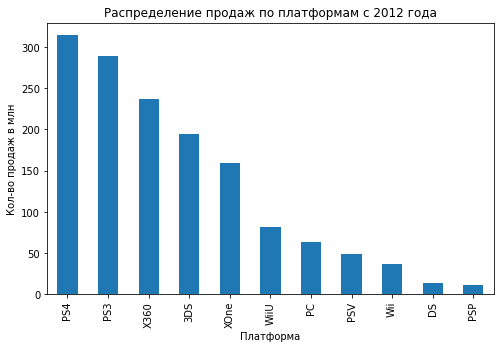

In [48]:
#сохраним срез с годом релиза от 2012 года
data_actual = data.query('year_of_release>=2012')

#визуализируем продажи по платформам
data_actual.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(kind='bar',\
                                            title='Распределение продаж по платформам c 2012 года',figsize=(8,5))
plt.xlabel('Платформа');
plt.ylabel('Кол-во продаж в млн');

Как мы узнали ранее, DS - прекратила продажи в 2013 году,как и Wii,срок активной жизни PC и PC2 завершился-   поэтому данные платформы сразу отпадают. Проверим оставшиеся 5 платформ: PS4, PS3(несмотря на существенное снижение продаж с 2013, данная платформа тем не менее остается наиболее крупной - поэтому оставим для оценки),3DS,XOne и X360.

Построми гистограмму для указанных выше платформ за период 2012 - 2016 года

In [49]:
#в переменную сохраним список с платформами
actual_platform = data_actual.groupby('platform')['all_sales'].sum()\
                   .sort_values(ascending=False).head(5).index.tolist()
# создадим сводную таблицу на основании среза с указанными платформами
actual_sales = data_actual.query('platform in @actual_platform')\
     .pivot_table(index=['platform','year_of_release'],values='all_sales',aggfunc='sum').reset_index()

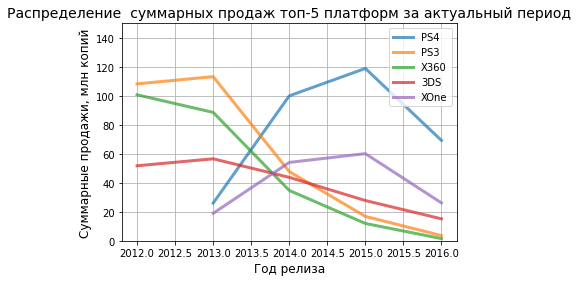

In [50]:
#создадим цикл для построения графика для каждой платформы из списка actual_platform
for i in actual_platform:
    plot(actual_sales.query('platform==@i')['year_of_release'],\
         actual_sales.query('platform==@i')['all_sales'], label=i)

plt.legend()
plt.grid(True)
plt.ylim(0, 150)
plt.ylabel('Суммарные продажи, млн копий', fontsize=12)
plt.xlabel('Год релиза', fontsize=12)
plt.title('Распределение  суммарных продаж топ-5 платформ за актуальный период', fontsize=14)
plt.show() 

Мы наблюдаем резкое падение продаж PS3 ввиду развития PS4, поэтому PS3 как потенциальную платформу отметаем. Платформы XOne и PS4 являются самыми "молодыми", показали существенный рост в период с 2013 по 2015, но после 2015 начали довольно резкое падение. 3DS также одна из новых платформ, имела пик в самом начале "жизни" в 2011 году, после которого начала плавное снижение, продажи Х360 почти прекратились в 2015 году

Т.о. наиболее потенциально прибыльными платформами являются XOne, PS4 и 3DS. При этом необходимо учитывать, что даже на этих платформах продажи ежегодно снижаются, как и на всем рынке консольных игр  

### Глобальные продажи игр в разбивке по платформам

Построим диаграмму размаха по глобальным продажам за актуальный период, опишем результат.

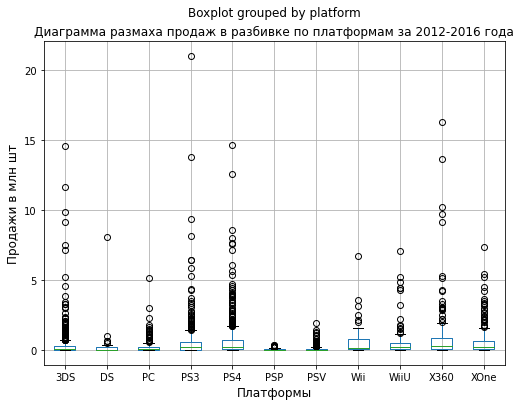

In [51]:
data_actual.boxplot('all_sales', by='platform', figsize=(8,6))
plt.ylabel('Продажи в млн шт', fontsize=12);
plt.xlabel('Платформы', fontsize=12);
plt.title('Диаграмма размаха продаж в разбивке по платформам за 2012-2016 года');

Выбросы не более 22 млн копий. Поскольку не видно границ ящиков и "усов", для их визуальной оценки посмотрим поближе - без учета выбросов свыше 2 млн за игру (граница в 2 млн выбрана в связи с тем, что это значение является ближайшим к самому большому из 1,5 межквартильных размахов)

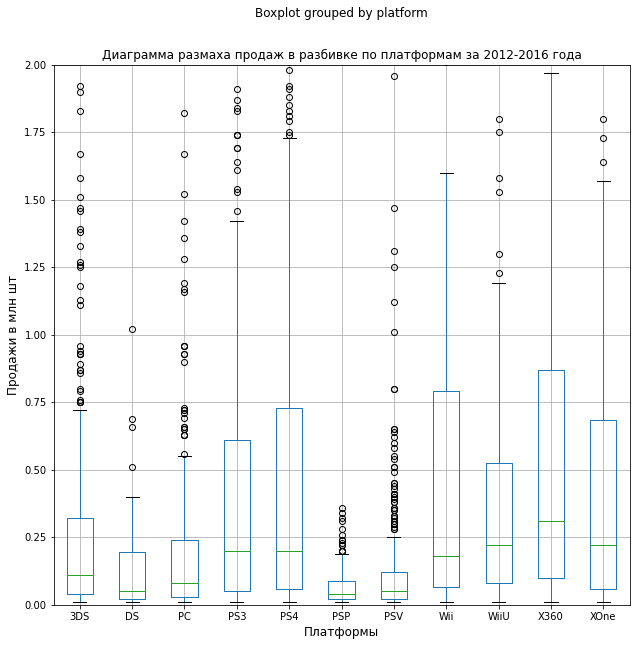

In [52]:
data_actual.boxplot('all_sales', by='platform', figsize=(10,10))
plt.ylim(0,2);
plt.ylabel('Продажи в млн шт', fontsize=12);
plt.xlabel('Платформы', fontsize=12);
plt.title('Диаграмма размаха продаж в разбивке по платформам за 2012-2016 года');

Картина при оценке продаж за актуальный период:
 - за актуальный период наибольшие продажи (без учета выбросов) и медиану продаж показала Х360 (продажи доходили почти до 2-х млн,медиана - 0.3 млн копий),
 - максимальные значения продаж (без учета выбросов) и медиан прочих крупнейших платформ:PS4 - 1.72 и 0.2 соответственно,Wii - свыше 1.63 и 0.18, PS3- 1.42 и 0,2 соответственно,  XOne-1.6 и 0.23 соответственно.Т.о., за исключением Х360, медианные значения продаж крупнейших платформ колеблятся рядом с отметкой в 0.2 млн ( в интервале от 0.18 до 0.23), максимальные продажи различаются чуть больше - от 1.42 до 1.72 млн
 - выбросы  у старых платформ ХВ и PS - видимо какие-то топовые популярные игры, 
 - PS4 вышла только в 2013 году, но продажи и медиана наравне предшественника PS3,
 - у "отживающих" платформ продажи, как и медианы, в разы ниже, чем у крупнейших за актуальный период.

С учетом понимания, что  DS - прекратила продажи в 2013 году,как и Wii,срок активной жизни PC и PC2 завершился, X360 показал минимальные продажи в 2016 году (в апреле 2016 прекращено производство), PS3 также в 2016 году упало в продажах (см. предыдущий пункт), по-прежнему наиболее потенциально прибыльными платформами являются XOne, PS4 и 3DS

### Влияние на продажи отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве примера возьмем PS3, поскольку это самая популярная платформа как за весь период, так 2-я по популярности за актуальный период. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами за актуальный период, сформулируем выводы.

Сначала построим диаграмму рассеяния для оценки связи продажи и отзывов критиков

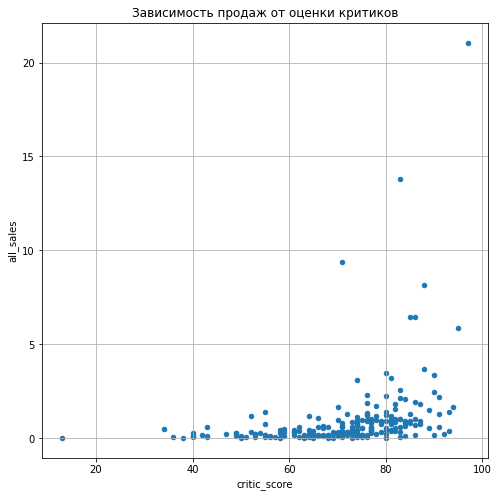

In [53]:
#сохраним срез в переменную
PS3 = data_actual.query('platform=="PS3"').filter(['all_sales','critic_score','user_score'])
#выведем диаграмму рассеяния
PS3.plot(kind='scatter', x='critic_score',y='all_sales',\
         title='Зависимость продаж от оценки критиков',figsize=(8, 8), grid=True);

При оценке критиков ниже 60, можно сказать, что взаимосвязи почти нет, но при росте оценки некоторая связь присутствует - чем больше оценка, тем выше продажи

Построим диаграмму рассеяния для оценки связи продажи и отзывов пользователей

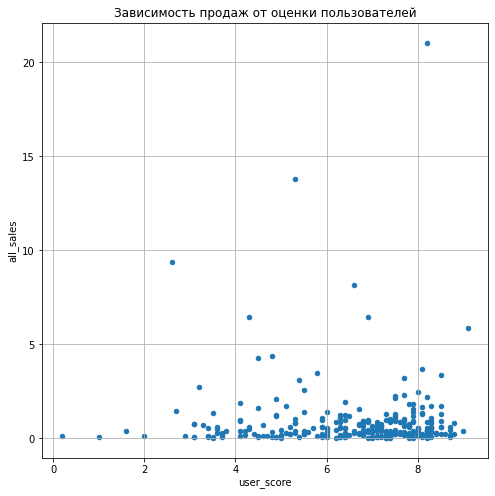

In [54]:
PS3.plot(kind='scatter', x='user_score',y='all_sales',\
         title='Зависимость продаж от оценки пользователей',figsize=(8, 8), grid=True);

Независимо от оценки пользователей присутствуют как низкие, так и высокие продажи, выбросы.

Посчитаем корреляцию через коэф-т Пирсона

In [55]:
PS3.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.33,-0.01
critic_score,0.33,1.00,0.54
user_score,-0.01,0.54,1.00


Коэф-т Пирсона демонстрирует наличие линейной зависимости между продажами и отзывами критиков, которая характеризуется слабой прямой выраженностью (значение 0.33), в то время как оценки пользователей корреляции с продажами не имеют. Стоит отметить при этом, что корреляция между отзывами критиков и отзывами пользователей присутствует, она положительная и выше, чем между продажами и отзывами критиков

### Продажи игр на других платформах

Оценим,присутствует та же корреляция между продажами и отзывами на других платформах: возьмем в качестве примера еще одну крупнейшую платформу из потенциальных- PS4 и наименьшую из них - XOne.

Построим матрицу рассеивания  и посчитаем корреляцию для PS4

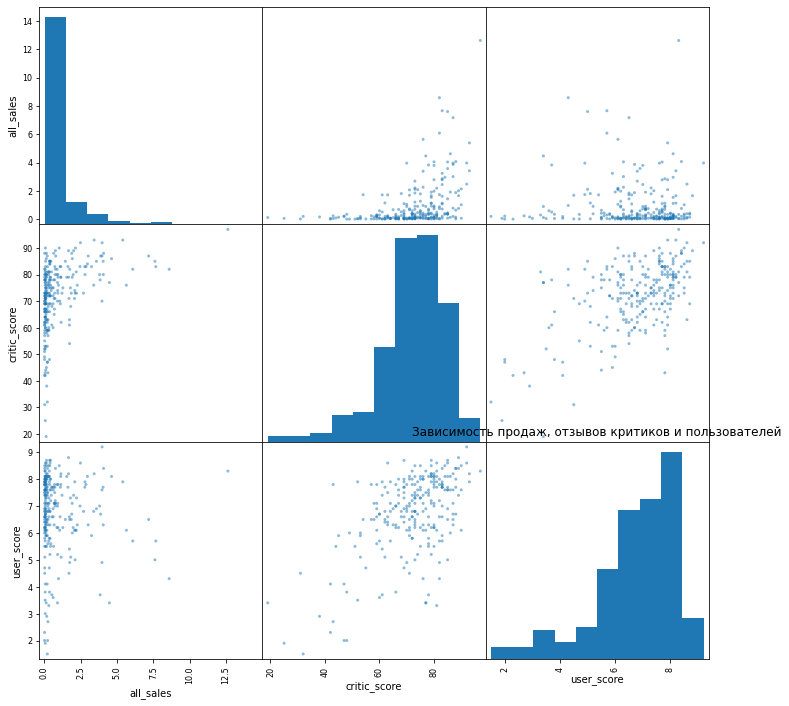

In [56]:
#сохраним срез в переменную
PS4 = data_actual.query('platform=="PS4"').filter(['all_sales','critic_score','user_score'])
#выведем матрицу рассеяния
pd.plotting.scatter_matrix(PS4,figsize=(12, 12), grid=True);
plt.title('Зависимость продаж, отзывов критиков и пользователей');

In [57]:
PS4.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


На графике видно, что при увеличении оценки критиков растут продажи, в то время как линейная зависимость продаж и оценки пользователей не прослеживается. Коэф-т Пирсона это подтверждает, причем полученный коэф-т корреляции между продажами и отзывами критиков выше, чем у  PS3.

Построим матрицу рассеивания  и посчитаем корреляцию для XOne

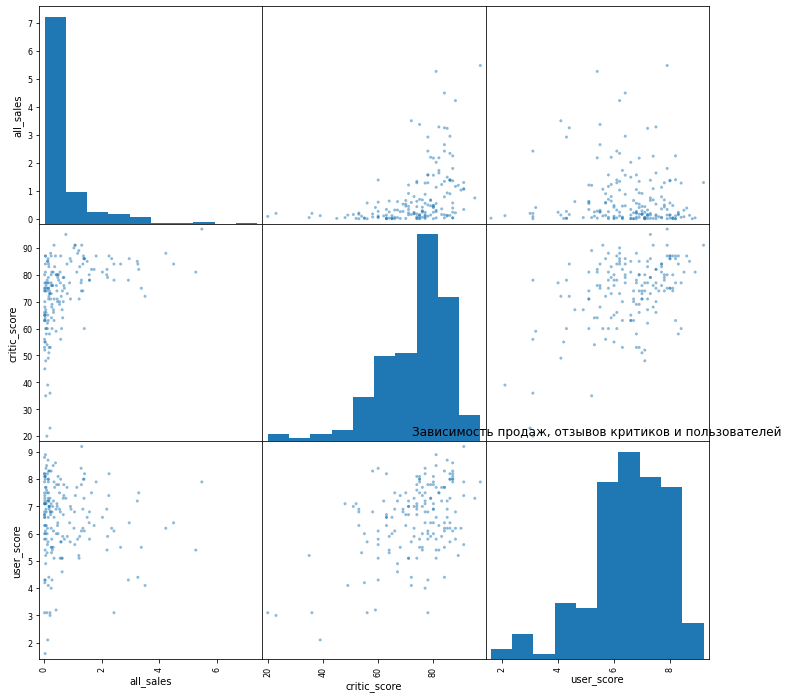

In [58]:
#сохраним срез в переменную
XOne = data_actual.query('platform=="XOne"').filter(['all_sales','critic_score','user_score'])
#выведем матрицу рассеяния
pd.plotting.scatter_matrix(XOne,figsize=(12, 12), grid=True);
plt.title('Зависимость продаж, отзывов критиков и пользователей');

In [59]:
XOne.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.42,-0.07
critic_score,0.42,1.00,0.47
user_score,-0.07,0.47,1.00


По диаграммам рассеивания аналогично PS4 при увеличении оценки критиков растут продажи, в то время как линейная связь продаж и оценки пользователей не прослеживается.Полученный коэф-т  корреляции продаж и отзывов критиков примерно совпадает с аналогичным у PS4, а вот взаимосвязь оценки пользователей и критиков на каждой платформе отличается.

Т.о. присутствует корреляция между отзывами критиков и уровнем продаж (связь умеренная положительная - коэф-т Пирсона от 0.33 до 0.42), в то время как линейная взаимосвязь между продажами и оценками пользователей не выявлена.

Стоит отметить, что для более давней платформы PS3 коррелляция между отзывами критиков и продажами меньше, чем у более новых платформ PS4 и XOne, что логично: PS3- старая платформа с зарекомендованным именем, при покупке пользователи уже меньше обращают внимания на отзыввы, в то время как продукты с новых платформ могут быть с багами и пр. - поэтому пользователи более склонны обращать внимание на отзывы экспертов.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посчитаем кол-во игр в каждом жанре, размер продаж, приходящийся на каждый жанр, а также среднее и медианное значение продаж (напомним, что значение продаж представлено в млн проданных копий)

In [60]:
#создадим сводную таблицу с продажами,кол-вом в разрезе жанров
genre = data_actual.pivot_table(index='genre',values=['name','all_sales'],\
                                aggfunc={'name':'count','all_sales':['sum','mean','median']})\
                   .reset_index()
#поименуем столбцы
genre.columns=['genre','all_sales_mean','all_sales_median','all_sales_sum','count']
# выведем таблицу в порядке убывания продаж
genre.sort_values(by='all_sales_sum', ascending=False)

,genre,all_sales_mean,all_sales_median,all_sales_sum,count
0,Action,0.43,0.12,446.41,1041
8,Shooter,1.29,0.43,304.75,237
7,Role-Playing,0.52,0.14,192.80,370
10,Sports,0.68,0.24,181.06,267
3,Misc,0.44,0.12,85.28,193
4,Platform,0.72,0.21,61.00,85
6,Racing,0.47,0.14,53.50,115
2,Fighting,0.41,0.13,44.49,109
9,Simulation,0.44,0.12,35.12,80
1,Adventure,0.10,0.03,29.43,302


Построим гистограмму распределения продаж по жанрам и распределения кол-ва игр по жанрам

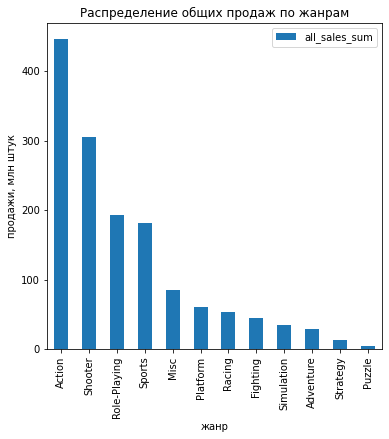

In [61]:
#столбчатая гистограмма распределения продаж по жанрам
genre.sort_values(by='all_sales_sum', ascending=False)\
.plot(kind='bar',x='genre',y='all_sales_sum',figsize=(6,6),\
           title='Распределение общих продаж по жанрам');
plt.xlabel('жанр');
plt.ylabel('продажи, млн штук');

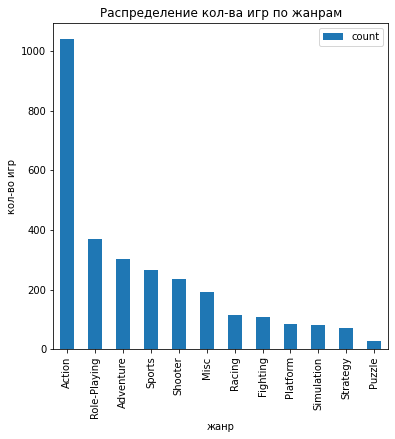

In [62]:
#столбчатая гистограмма распределения кол-ва игра по жанрам
genre.sort_values(by='count', ascending=False)\
.plot(kind='bar',x='genre',y='count',figsize=(6,6),title='Распределение кол-ва игр по жанрам');
plt.xlabel('жанр');
plt.ylabel('кол-во игр');

С точки зрения совокупных продаж-  преобладающим  является жанр Action, за ним с большим отрывом идут Shooter, Sports и Role-Playing, по кол-ву выпущенных игр снова лидирует -Action, далее с большим отрывом Role-Playing, Sports и Adventure.
Наименьшим по продажам и по кол-ву игр -  является  Puzzle, затем Strategy В топ-3 с наименьшими совокупными продажами также входит Adventure, хотя по данному жанру выпущено большее кол-во игр, чем для Strategy и Puzzle

Рассмотрим с точки зрения средней стоимости и медианы

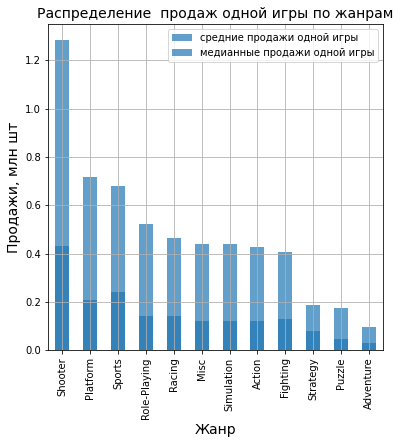

In [63]:
genre = genre.sort_values(by='all_sales_mean', ascending=False)
#гистограмма распределения средней и медианной продаж 1-й игры
ax = genre.plot(
    kind='bar',
    x='genre',
    y='all_sales_mean',
    linewidth=3,
    alpha=0.7,
    label='средние продажи одной игры',
    legend=True,
    figsize = (6,6),
);    
genre.plot(
    kind='bar',
    x='genre',
    y='all_sales_median',
    linewidth=3,
    alpha=0.7,
    label='медианные продажи одной игры',
    ax=ax,
    legend=True,
    figsize = (6,6),
);
plt.grid(True)
plt.ylabel('Продажи, млн шт', fontsize=14);
plt.xlabel('Жанр', fontsize=14);
plt.title('Распределение  продаж одной игры по жанрам',fontsize=14);    

При этом с т.з. средних продаж и медианы продаж на одну игру с большим отрывом в продажах лидирует жанр Shooter, далее Platform, Sports. Далее  самые маленькие продажи на одну игру у жанра Adventure, Strategy и Puzzle.

Т.о.,
 - лидеры:
   - наиболее популярным с т.з. общих продаж  является жанр Action, за ним с большим отрывом идут Shooter, Sports и Role-Playing, по кол-ву выпущенных игр снова лидирует -Action, далее с большим отрывом Role-Playing, Sports и Adventure.
   - при этом, с т.з. кол-ва продаж на одну игру, т.е. фактически выручки на 1 игру, лидирует жанр Shooter, далее Platform, Sports.
 - "аутсайдеры":
   - Наименьшим по продажам и по кол-ву игр -  является  Puzzle, затем Strategy. В топ-3 с наименьшими совокупными продажами также входит Adventure, хотя по данному жанру выпущено большее кол-во игр, чем для Strategy и Puzzle,
   - самые маленькие продажи на одну игру у жанра Adventure, Strategy и Puzzle.
   
Казалось бы, жанры, которые генерят наибольшие и наименьшие продажи ясны, но при этом необходимо понимать, что и затраты на разработку игр Shooter и Puzzle будут отличаться в разы, поэтому дать однозначный ответ о наиболее и наименее прибыльных жанрах на основании представленных данных нельзя. Если исходить из того, что затраты на разработку, т.е. постоянные расходы в процессе создания и продвижении продукта будут одинаковыми, то конечно, наиболее прибыльной будет игра, у которой выше продажи, а именно, Shooter, Platform, Sports; наименее - Adventure, Strategy и Puzzle

**Вывод по исследовательскому анализу**:

1) Учитывая распределение данных о выпуске игр, данные до 1993 года являются крайне несущественными, в т.ч. они оцениваются как выбросы,за этот период практически 100% пропусков по отзывам пользователей и рейтингам,

2) Топ-6 платформ по суммарным продажам за период с 1993 года:  PS2, X360, PS3, Wii, DS, PS. На основании распределения продаж данных платформ по годам сформулировано следующее суждение о сроке «жизни» платформы: в целом, срок активной "жизни" (период активных продаж) составляет около 10-11 лет, при этом пик продаж приходится на 3-5 год "жизни". Учитывая постоянно ускоряющийся технический прогресс, увеличение пропускной способности, качества в геометрической прогресс, данный срок вполне ожидаем.

3) Для прогнозирований данных на 2017 год для последующего анализа используется период с 2012 по 2016 года (включительно оба года) - далее актуальный период. Данный период определен следующим образом: срок "активной" жизни платформы составляет 10-11 лет, пик продаж приходится на 3-5 год "жизни", после чего продажи идут на спад - если мы возьмем период в последние 5 лет до года прогнозирования (2012-2016 года включительно), то мы как раз отследим как затухающие платформы, так и развивающиеся

4) В рамках анализа распределения продаж в актуальный период в разрезе платформ выявлено 3 потенциально прибыльных платформы- XOne, PS4 и 3DS. При этом необходимо учитывать, что даже на этих платформах продажи ежегодно снижаются, как и на всем рынке  консольных игр

5) Анализ диаграммы размаха за актуальный период показала следующее:
 - за актуальный период наибольшие продажи (без учета выбросов) и медиану продаж показала Х360 (продажи доходили почти до 2-х млн,медиана - 0.3 млн копий),
 - максимальные значения продаж (без учета выбросов) и медиан прочих крупнейших платформ:PS4 - 1.72 и 0.2 соответственно,Wii - свыше 1.63 и 0.18, PS3- 1.42 и 0,2 соответственно,  XOne-1.6 и 0.23 соответственно.Т.о., за исключением Х360, медианные значения продаж крупнейших платформ колеблятся рядом с отметкой в 0.2 млн ( в интервале от 0.18 до 0.23), максимальные продажи различаются чуть больше - от 1.42 до 1.72 млн
 - выбросы  у старых платформ ХВ и PS - видимо какие-то топовые популярные игры, 
 - PS4 вышла только в 2013 году, но продажи и медиана наравне предшественника PS3,
 - у "отживающих" платформ продажи, как и медианы, в разы ниже, чем у крупнейших за актуальный период.

6) Оценки критиков демонстрируют прямую, средне-слабую корреляцию с уровнем продаж. Оценки пользователей корреляции с продажами не имеют. При этом стоит отметить, что для более давней платформы PS3 корреляция между отзывами критиков и продажами меньше, чем у более новых платформ PS4 и XOne, что логично: PS3- старая платформа с зарекомендованным именем, при покупке пользователи уже меньше обращают внимания на отзыввы, в то время как продукты с новых платформ могут быть с багами и пр. - поэтому пользователи более склонны обращать внимание на отзывы экспертов.

7) Распределение игр по жанрам:
 - лидеры:
   - наиболее популярным с т.з. общих продаж  является жанр Action, за ним с большим отрывом идут Shooter, Sports и Role-Playing, по кол-ву выпущенных игр снова лидирует -Action, далее с большим отрывом Role-Playing, Sports и Adventure.
   - при этом, с т.з. кол-ва продаж на одну игру, т.е. фактически выручки на 1 игру, лидирует жанр Shooter, далее Platform, Sports.
 - "аутсайдеры":
   - Наименьшим по продажам и по кол-ву игр -  является  Puzzle, затем Strategy. В топ-3 с наименьшими совокупными продажами также входит Adventure, хотя по данному жанру выпущено большее кол-во игр, чем для Strategy и Puzzle,
   - самые маленькие продажи на одну игру у жанра Adventure, Strategy и Puzzle.

Необходимо понимать, что затраты на разработку игр Shooter и Puzzle, соответственно, закупочная цена для интернет-магазина, будут отличаться в разы, поэтому дать однозначный ответ о наиболее и наименее прибыльных жанрах на основании представленных данных нельзя. Если исходить из того, что затраты на разработку, т.е. постоянные расходы в процессе создания и продвижении продукта будут одинаковыми, то конечно, наиболее прибыльной будет игра, у которой выше продажи, а именно, Shooter, Platform, Sports; наименее - Adventure, Strategy и Puzzle


## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясним разницу.
 - Оценим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Самые популярные платформы

Самыми популярными платформами (топ-5) за актуальный период по всем продажам являются: X360,PS4,XOne,3DS,PS3.
Проверим совпадает ли этот список с топ-5 в каждом регионе.

Визуализируем доли платформы в каждом регионе

In [64]:
#напишем функцию для определения топ-5
def region_top_5(df, index, values, aggfunc):
    return df.pivot_table(
        index=index,
        values=values,
        aggfunc=[aggfunc]
    ).droplevel(1, axis=1).sort_values(by=aggfunc, ascending=False).head().reset_index()
#сохраним в переменную топ-5 по платформам для каждого региона через функцию
na_platform = region_top_5(data_actual, 'platform', 'na_sales', 'sum')
eu_platform = region_top_5(data_actual, 'platform', 'eu_sales', 'sum')
jp_platform = region_top_5(data_actual, 'platform', 'jp_sales', 'sum')
#посмотрим как выглядит для Европы
eu_platform

,platform,sum
0,PS4,141.09
1,PS3,107.26
2,X360,74.89
3,XOne,51.59
4,3DS,42.83


In [65]:
#сохраним в переменную словарь с продажами по прочим плаформам для Америки
na = {'platform':'others','sum': (data_actual['na_sales'].sum() - na_platform['sum'].sum())}
#сохраним в переменную топ-5 еще строку с продажами прочих платформ
na_platform = na_platform.append(na, ignore_index=True)
na_platform

,platform,sum
0,X360,140.57
1,PS4,108.74
2,PS3,103.74
3,XOne,93.12
4,3DS,55.49
5,others,91.64


Аналогично добавим строку с продажами прочих платформ для других регионов

In [66]:
eu = {'platform':'others','sum': (data_actual['eu_sales'].sum() - eu_platform['sum'].sum())}
eu_platform = eu_platform.append(eu, ignore_index=True)
jp = {'platform':'others','sum': (data_actual['jp_sales'].sum() - jp_platform['sum'].sum())}
jp_platform = jp_platform.append(jp, ignore_index=True)

Визуализируем распределение продаж для всех регионов с учетом топ-5 и прочих платформ

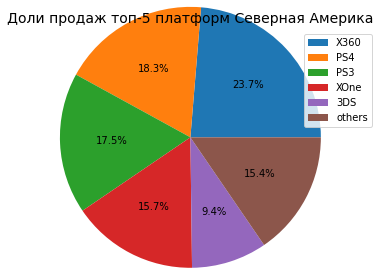

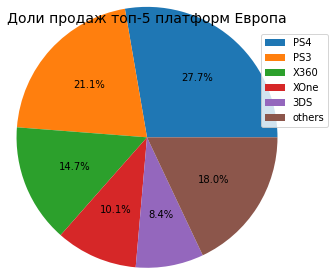

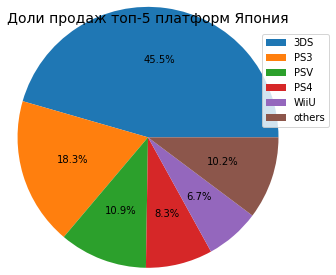

In [67]:
#напишем функцию для круговой диаграммы 
def pie(df, labels, title):
    plt.pie(df, autopct='%.1f%%', radius=1.5)
    plt.title(title,fontsize=14);
    plt.legend(labels = labels,loc='upper left', bbox_to_anchor=(1.0, 1.0));
    plt.show()

# выведем 3 круговых графика на одном 
pie(na_platform['sum'], na_platform['platform'],'Доли продаж топ-5 платформ Северная Америка')
pie(eu_platform['sum'], eu_platform['platform'],'Доли продаж топ-5 платформ Европа')
pie(jp_platform['sum'], jp_platform['platform'],'Доли продаж топ-5 платформ Япония')


Исходя из диаграмм, видим следующее относительно популярности платформ:
 - В Северной Америке наибольшую популярность имели игры с платформ  X360, далее PS4, PS3, XOne и 3DS - топ-5 платформ формируют почти 85% от всех продаж, прочие платформы - четь более 15%, 
 - В Европе наиболее популярны PS4, далее PS3, X360, XOne,3DS опять наименее популярна - топ-5 платформ формируют 82% продаж, прочие - 18%,
 - В Японии, распределение долей существенно отличается от Северной Америки и Европы: лидером с большим отрывом являются  - японская 3DS. За ними американские приставки PS3, PSV, PS4, после Wii.X360 вообще отсутствует в топе, хотя в Северной Америке и Европе имеет 1-е и 2-е местов. Топ-5 формируют 90%, прочие 10%. 

### Самые популярные жанры

Наиболее популярным с т.з. общих продаж является жанр Action, за ним с большим отрывом идут Shooter, Sports и Role-Playing, по кол-ву выпущенных игр снова лидирует -Action, далее с большим отрывом Role-Playing, Sports и Adventure.
Проверим совпадает ли это с отдельными регионами

In [68]:
#сохраним в переменную топ-5 по жанрам для каждого региона через функцию
na_genre = (region_top_5(data_actual, 'genre', 'na_sales', 'sum'))
eu_genre = (region_top_5(data_actual, 'genre', 'eu_sales', 'sum'))
jp_genre = (region_top_5(data_actual, 'genre', 'jp_sales', 'sum'))

In [69]:
#сохраним в переменную словарь с продажами по прочим жанрам для регионов и 
#сохраним в переменную топ-5 жанров для каждого региона еще строку с продажами прочих платформ
na = {'genre':'others','sum': (data_actual['na_sales'].sum() - na_genre['sum'].sum())}
na_genre = na_genre.append(na, ignore_index=True)
eu = {'genre':'others','sum': (data_actual['eu_sales'].sum() - eu_genre['sum'].sum())}
eu_genre = eu_genre.append(eu, ignore_index=True)
jp = {'genre':'others','sum': (data_actual['jp_sales'].sum() - jp_genre['sum'].sum())}
jp_genre = jp_genre.append(jp, ignore_index=True)
# посмотрим как будет выглядеть таблица с топ-5 жанров для Японии
jp_genre

,genre,sum
0,Role-Playing,65.44
1,Action,52.80
2,Misc,13.10
3,Simulation,10.41
4,Fighting,9.44
5,others,41.63


Визуализируем данные по топ-5 жанров по регионам

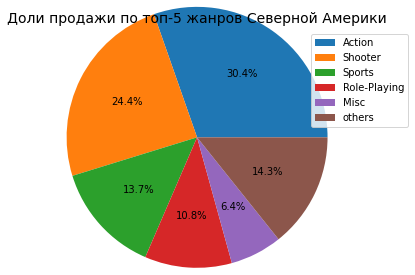

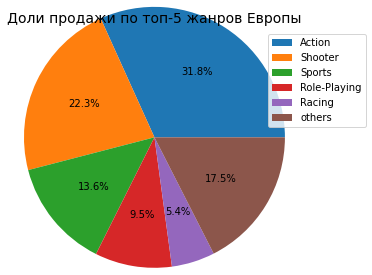

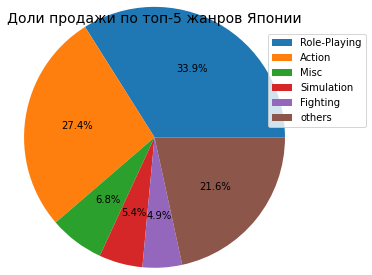

In [70]:
# выведем 3 круговых графика на одном   
pie(na_genre['sum'], na_genre['genre'],'Доли продажи по топ-5 жанров Северной Америки');
pie(eu_genre['sum'], eu_genre['genre'],'Доли продажи по топ-5 жанров Европы');
pie(jp_genre['sum'], jp_genre['genre'],'Доли продажи по топ-5 жанров Японии');

В Америке и Европе распределение по 4-м наиболее популярным жанрам почти одинаковое (+- 1-2%): наиболее популярны Action, затем Shotter, Sports и  Role-Playing, разница только в наименее популярном из 5-ти жанров - у Америки это Misc, у Европы  - Racing. Доля наиболее популярных жанров у Америки и Европы  - 86 и 82.5% соответственно.

Иная картина у Японии:здесь не самы популярный для Америки и Европы жанр Role-Playing является самым популярным, уже за ним также с большой долей идет Action, с небольшими долями в топе Misc,Simulation,Fighting. Доля 5-ти топовых жанров менее 80% - 78.4%.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Градация рейтинга согласно википедии следующая:
 - «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
 - «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
 - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
 - «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое
 - «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу
 - «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант.

М и АО фактически об одном возрасте, если в актуальном период встретятся такие данные, то заменим их на одно значение.
 
Посмотрим какие значение рейтинга встречаются у нас 

In [71]:
data_actual['rating'].unique()

array(['M', 'no_rating', 'E', 'E10+', 'T'], dtype=object)

В актуальном периоде встречаются только Е-для всех, Е10+ - от 10 лет и старше, Т - для подростков от 13 лет, М - для взрослых (старше 18 лет), ничего заменять не нужно.

Вспоним, что оценка ESRB проводится по играм продаваемым в США и Канаде, поэтому  при продажах только  в Европе или только в Японии доля пропусков в рейтинге будет выше (для Японии свыше 90%).

In [72]:
#напишем функцию для группировки по рейтингу
def region_rating(df, index, values, aggfunc):
    return df.pivot_table(
        index=index,
        values=values,
        aggfunc=[aggfunc]
    ).droplevel(1, axis=1).sort_values(by=aggfunc, ascending=False).reset_index()
#сохраним в отдельные переменные сортировку по региону
na_rating = region_rating(data_actual, 'rating', 'na_sales', 'sum')
eu_rating = region_rating(data_actual, 'rating', 'eu_sales', 'sum')
jp_rating = region_rating(data_actual, 'rating', 'jp_sales', 'sum')  

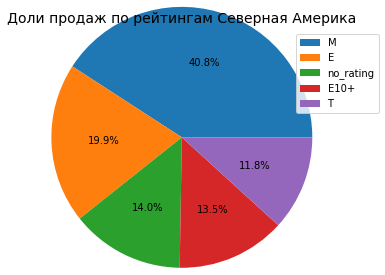

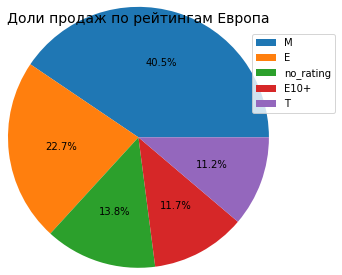

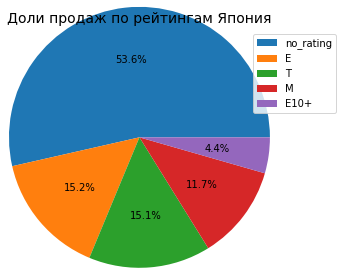

In [73]:
# выведем 3 круговых графика на одном  
pie(na_rating['sum'],na_rating['rating'],'Доли продаж по рейтингам Северная Америка') 
pie(eu_rating['sum'],eu_rating['rating'],'Доли продаж по рейтингам Европа')
pie(jp_rating['sum'],jp_rating['rating'],'Доли продаж по рейтингам Япония')

Распределение рейтингов по возрастам в Америке и Европе схоже - доля игр для взрослых около 40%, для всех 20% - в Америке и 23% - в Европе, рейтинг отсутствует примерно в одинаковой доле - 14%, для подростков - 11-12%,от 10 лет и старше - 12-13.5%.
Иное распределение в Японии:отсутствующий рейтинг у почти 54% всех продаж, по 15% на игры для всех и для подростков, 12% - игры для взрослых и 4% - от 10 лет.

**Вывод по портрету пользователя каждого региона**:

На продажи в целом в каждом регионе оказывают влияние платформы, на которых выходят игры, жанры и возрастная категория - рейтинг ESRB. При этом портрет пользователя Северной Америки и Европы очень похож, а портрет пользователя из Японии отличается. Опишем отдельно по каждому пункту:

1) Платформы:
 - В Северной Америке наибольшую популярность имели игры с платформ X360, далее PS4, PS3, XOne и 3DS - топ-5 платформ формируют почти 85% от всех продаж, прочие платформы - четь более 15%,
 - В Европе наиболее популярны PS4, далее PS3, X360, XOne,3DS опять наименее популярна - топ-5 платформ формируют 82% продаж, прочие - 18%,
 - В Японии, распределение долей существенно отличается от Северной Америки и Европы: лидером с большим отрывом являются - японская 3DS. За ними американские приставки PS3, PSV, PS4, после Wii.X360 вообще отсутствует в топе, хотя в Северной Америке и Европе имеет 1-е и 2-е местов. Топ-5 формируют 90%, прочие 10%.

2) Жанры:
 - В Америке и Европе распределение по 4-м наиболее популярным жанрам почти одинаковое (+- 1-2%): наиболее популярны Action, затем Shotter, Sports и  Role-Playing, разница только в наименее популярном из 5-ти жанров - у Америки это Misc, у Европы  - Racing. Доля наиболее популярных жанров у Америки и Европы  - 86 и 82.5% соответственно.
 - Иная картина у Японии:здесь не самый популярный для Америки и Европы жанр Role-Playing является самым популярным, уже за ним также с большой долей идет Action, с небольшими долями в топе Misc,Simulation,Fighting. Доля 5-ти топовых жанров менее 80% - 78.4%.

3) Рейтинг ESRB:
 - Распределение рейтингов по возрастам в Америке и Европе схоже - доля игр для взрослых около 40%, для всех 20% - в Америке и 23% - в Европе, рейтинг отсутствует примерно в одинаковой доле - 14%, для подростков - 11-12%,от 10 лет и старше - 12-13.5%.
 - Иное распределение в Японии:отсутствующий рейтинг у почти 54% всех продаж, по 15% на игры для всех и для подростков, 12% - игры для взрослых и 4% - от 10 лет.


## Проверка гипотез

Проверьте гипотезы
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC

Когда 2 генеральные совокупности исчисляются большим кол-вом значений и при этом необходимо сопоставить их среднее значение, для того чтобы понимать, что значение из одной совокупности в среднем будут больше/меньше/равны/неравны среднему значению из другой совокупности, используется метод проверки гипотезы об их равенстве/неравенстве/одно больше/меньше другого.

Нулевая гипотеза – это чаще всего основное проверяемое предположение, которое обычно формулируется как отсутствие различий, отсутствие влияние фактора, отсутствие эффекта, равенство нулю значений выборочных характеристик и т. п., в альтернативной - что одно значение больше/меньше/неравно.

Сформулируем нулевую и альтернативную гипотезы:
 - H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые,
 - H1: средние пользовательские рейтинги платформ Xbox One и PC не равны.
 
Для проверки гипотез будем использовать t-критерий Стьюдента. Двухвыборочный t-тест для независимых выборок, альтернативную гипотезу - двустороннюю. alpha зададим в размере обычно принимаемого 5%.

Посчитаем средние значение рейтинга для каждой платформы и далее посчитаем p-value и вывод от отвержении/не отвержении нулевой гипотезы

In [74]:
XOne = data_actual.query('platform=="XOne"')['user_score'].dropna()
f'Средние пользовательские рейтинги платформ Xbox One:{round(XOne.mean(),2)} баллов'

'Средние пользовательские рейтинги платформ Xbox One:6.52 баллов'

In [75]:
PC = data_actual.query('platform=="PC"')['user_score'].dropna()
f'Средние пользовательские рейтинги платформ PC:{round(PC.mean(),2)} баллов'

'Средние пользовательские рейтинги платформ PC:6.45 баллов'

In [76]:
#установим уровень стат значимости на уровне 5%
alpha = 0.05
# используем двухвыборочный t-тест для независимых выборок
results = st.ttest_ind(XOne,PC,alternative='two-sided')
# выведем полученное значение p-value
'р-значение:', results.pvalue

('р-значение:', 0.6252774522173157)

In [77]:
#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


При уровне стат значимости 5% гипотеза о том, что рейтинги обоих платформ равны не отвергнута, в т.ч. она косвенно подтверждается примерно равными средними баллами - 6.52 и 6.45. При уровне стат значимости скажем 10%, гипотеза о равенстве была бы отвергнута.

### Гипотеза о неравенстве средних пользовательских рейтингов жанров Action  и Sports

Сформулируем нулевую и альтернативную гипотезы:
 - H0: средние пользовательские рейтинги жанров Action  и Sports одинаковые,
 - H1: средние пользовательские рейтинги жанров Action  и Sports не равны.
 
Для проверки гипотез также будем использовать t-критерий Стьюдента для независимых выборок. Двухвыборочный t-тест для независимых выборок, альтернативную гипотезу - двустороннюю. alpha зададим в размере обычно принимаемого 5%.

Посчитаем средние значение рейтинга для каждой платформы и далее посчитаем p-value и вывод об отвержении/не отвержении нулевой гипотезы

In [78]:
Action = data_actual.query('genre=="Action"')['user_score'].dropna()
f'Средние пользовательские рейтинги жанра  Action:{round(Action.mean(),2)} баллов'

'Средние пользовательские рейтинги жанра  Action:6.83 баллов'

In [79]:
Sports = data_actual.query('genre=="Sports"')['user_score'].dropna()
f'Средние пользовательские рейтинги жанра  Sports:{round(Sports.mean(),1)} баллов'

'Средние пользовательские рейтинги жанра  Sports:5.5 баллов'

In [80]:
#установим уровень стат значимости на уровне 5%
alpha = 0.05
# используем двухвыборочный t-тест для независимых выборок
results = st.ttest_ind(Action,Sports,alternative='two-sided')
# выведем полученное значение p-value
'р-значение:', results.pvalue

('р-значение:', 1.4822948747024695e-26)

In [81]:
#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, причем установленный уровень стат значимости на принятие/непринятие нулевой гипотезы не повлияет, т.к. полученное значение p-value больше 114%. В т.ч. исходя из посчитанных средних значений, мы видим, что средние пользовательсвие рейтинги жанра Action выше, чем для Sports.

**Вывод по проверке гипотез**:

Для проверки гипотез использован t-критерий Стьюдента. Двухвыборочный t-тест для независимых выборок, альтернативную гипотезу - двустороннюю, уровень стат значимости задан в размере обычно принимаемого 5%.

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
 - при уровне стат значимости 5% гипотеза о том, что рейтинги обоих платформ равны, не отвергается, в т.ч. она косвенно подтверждается примерно равными средними баллами - 6.52 и 6.45. При уровне стат значимости скажем 10%, гипотеза о равенстве была бы отвергнута.

2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:
 - гипотеза о равенстве рейтингов отвергнута, т.е. нельзя сказать, что пользовательские рейтинги жанров Action равны пользовательским рейтиингам жанра Sports, а значит они разные. Причем на ее принятие не оказывает влияние выбранный уровень стат значимости, поскольку полученное значение p-value больше 114%.Средний пользовательский рейтинг Action выше, чем  Sports.

## Общий вывод

В датафрейм представлено 16715 игр, выпущенных на разных платформах и разных жанров. Года релиза представлены выборкой от 1980 до 2016. Максимальные продажи в Северной Америке выше, чем в Европе в 2 раза, в то время как в Европе максимальные продажи почти в 3 раза выше, чем в Японии. В 3-х столбцах присутствовали существенные пропуски: в столбцах с оценкой критикой, пользователей и рейтингом от ESRB присутствует критичное кол-во пропусков (40% и выше), также небольшой процент пропусков в годах релиза(1.6%) и по 2 пропуска в названии и жанре игр. 

В 2000-ные начался активный рост рынка, но после 2009 рынок пошел на спад в связи с последствиями мирового финансового кризиса 2008-2009 года, и далее в связи с развитием мобильных игр.

**В рамках предобработки**  скорректирован тип данных, проведена работа по заполнению пропусков там, где это было возможно и целесообразно, проведен поиск дубликатов ( примерно четверть всех игр одного года выпуска были выпущены на нескольких платформах). Проведена работа по анализу возможных причин пропусков в рейтинге ESRB и отзывах пользователей/критиков, проведен анализ закономерностей пропусков в этих столбцах, далее приведены наиболее важные:
 - оценка критиков будет отсутствовать почти всегда при отсутствии оценки пользователей, а значение рейтинга ESRB почти всегда будет отсутствовать при отсутствии оценки критиков/пользователей,
 - с 2000 года на наличие пропусков влияет страна продаж: если игра не продается в Северной Америке,а в Европе то кол-во пропусков возрастает в 3 раза, при продажах только в Японии - свыше 90%,
 - регион продаж также влияет на кол-во отзывов критиков и пользователей:в ориентированной на продажи в Северной Америке играх доля пропусков наименьшая (32%), на Европу уже существенно выше (52%), на Японию - пропуски будут почти всегда. Предположительно для оценки используются только рейтинги на широкораспространенных языках ( английский и пр.), в который японский не входит. 

**В рамках исследовательского анализа** установлено следующее:
1) Топ-6 платформ по суммарным продажам за весь период: PS2, X360, PS3, Wii, DS, PS. 

2) На основании распределения продаж данных платформ по годам сформулировано следующее суждение о сроке «жизни» платформы: в целом, срок активной "жизни" (период активных продаж) составляет около 10-11 лет, при этом пик продаж приходится на 3-5 год "жизни".

3) Для прогнозирований данных на 2017 год для последующего анализа необходимо использовать период с 2012 по 2016 года (включительно оба года) - далее актуальный период. Данный период определен следующим образом: срок "активной" жизни платформы составляет 10-11 лет, пик продаж приходится на 3-5 год "жизни", после чего продажи идут на спад - при периоде в последние 5 лет до года прогнозирования (2012-2016 года включительно), можно отследить как затухающие платформы, так и развивающиеся

4) Потенциально прибыльные платформы- XOne, PS4 и 3DS. При этом необходимо учитывать, что даже на этих платформах продажи ежегодно снижаются, как и на всем рынке консольных игр

5) За актуальный период:
 - разовые продажи игр доходили до 22 млн копий,
 - наибольшие продажи (без учета выбросов) и медиану продаж показала Х360 (продажи доходили почти до 2-х млн,медиана - 0.3 млн копий),
 - за исключением Х360, медианные значения продаж крупнейших платформ колеблятся рядом с отметкой в 0.2 млн ( в интервале от 0.18 до 0.23), максимальные продажи различаются чуть больше - от 1.42 до 1.72 млн
 - выбросы присутствуют и у старых платформ ХВ и PS - видимо какие-то топовые популярные игры,
 - у "отживающих" платформ продажи, как и медианы, в разы ниже, чем у крупнейших за актуальный период.

6) Оценки критиков демонстрируют прямую, средне-слабую корреляцию с уровнем продаж. Оценки пользователей корреляции с продажами не имеют. При этом стоит отметить, что для более давней платформы PS3 корреляция между отзывами критиков и продажами меньше, чем у более новых платформ PS4 и XOne

7) Распределение игр по жанрам:
 - лидеры: наиболее популярным с т.з. общих продаж является жанр Action, за ним с большим отрывом идут Shooter, Sports и Role-Playing, по кол-ву выпущенных игр снова лидирует -Action, далее с большим отрывом Role-Playing, Sports и Adventure. При этом, с т.з. кол-ва продаж на одну игру, т.е. фактически выручки на 1 игру, лидирует жанр Shooter, далее Platform, Sports.
 - "аутсайдеры". Наименьшим по продажам и по кол-ву игр - является Puzzle, затем Strategy. В топ-3 с наименьшими совокупными продажами также входит Adventure, хотя по данному жанру выпущено большее кол-во игр, чем для Strategy и Puzzle. Самые маленькие продажи на одну игру у жанра Adventure, Strategy и Puzzle.

Необходимо понимать, что затраты на разработку игр Shooter и Puzzle, и соответственно цена закупа для интернет-магазина, будут отличаться в разы, поэтому дать однозначный ответ о наиболее и наименее прибыльных жанрах на основании представленных данных нельзя. Если исходить из того, что цена закупа одинаковая, то конечно, наиболее прибыльной будет игра, у которой выше продажи, а именно, Shooter, Platform, Sports; наименее - Adventure, Strategy и Puzzle

**Портрет пользователя** Северной Америки и Европы очень похож, а портрет пользователя из Японии отличается:
 - в Америке и Европе наибольшую популярность имеют X360 и PS4 (за ними  PS3, XOne и 3DS), в то время как в Японии лидером с большим отрывом является японская 3DS, за ней американские приставки PS3, PSV, PS4, X360 вообще отсутствует в топе.
 - В Америке и Европе распределение по 4-м наиболее популярным жанрам почти одинаковое (+- 1-2%): наиболее популярны Action, затем Shotter, Sports и Role-Playing. Иная картина у Японии:здесь не самый популярный для Америки и Европы жанр Role-Playing является самым популярным, уже за ним также с большой долей идет Action, с небольшими долями в топе Misc,Simulation,Fighting.
 - Распределение рейтингов по возрастам в Америке и Европе схоже - доля игр для взрослых около 40%, для всех 20% - в Америке и 23% - в Европе, рейтинг отсутствует примерно в одинаковой доле - 14%, для подростков - 11-12%,от 10 лет и старше - 12-13.5%. Иное распределение в Японии:отсутствующий рейтинг у почти 54% всех продаж, по 15% на игры для всех и для подростков, 12% - игры для взрослых и 4% - от 10 лет.

Также проверены гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC  - гипотеза не отвергнута, и о неравенстве средних пользовательских рейтингов жанров Action  и Sports - гипотеза подтверждена.

**Итого**,при прогнозировании кампании по продаже компьютерных игр необходимо обратить внимание на ряд факторов:
 - рынок продажи копмьютерных игр сокращается, при оценке уровня продаж необходимо это учитывать и закладывать понижающий коэф-т по сравнению с ретропериодами,
 - нужно понимать в каком регионе будет продаваться определенная игра, т.к. от этого зависит выбираемая платформа, жанр игры, возраст покупателя и  наличие отзывов критиков, которые имеют прямую взаимосвязь с уровнем продаж. При этом, возможно в Японии вполне успешно можно выпускать игры, более подходящие для рынка Америки и Европы, если у данной игры будут отзывы критиков на японском,
 - перспективными платформами являются XOne, PS4 и 3DS,
 - вероятность продаж при высоких оценках критиков повышается,
 - при выборе платформы и жанра игры стоит обратить внимание на средний рейтинг этой платформ, жанра,
 - наиболее продаваемыми жанрами являются Shooter, Platform, Sports, наименее - Adventure, Strategy и Puzzle.